In [ ]:
# Installing yfinance package 
# pip install yfinance

In [ ]:
# #Importing yfiance and downloading the required dataset.
# import yfinance as yf

# symbol = "AAPL"
# start_date = "1980-07-30"
# end_date = "2023-03-24"
# dataset = yf.download(symbol, start=start_date, end=end_date)
# print(dataset.head())
# print(len(dataset))
# print(dataset.shape)
# df.to_csv('Apple_stock_price-1984-2023.csv')

In [45]:
# Importing required files
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
#from pmdarima.arima.utils import ndiffs

In [48]:
df = pd.read_csv('Apple_stock_price-1980-2023.csv')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10635 entries, 0 to 10634
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10635 non-null  object 
 1   Open       10635 non-null  float64
 2   High       10635 non-null  float64
 3   Low        10635 non-null  float64
 4   Close      10635 non-null  float64
 5   Adj Close  10635 non-null  float64
 6   Volume     10635 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 581.7+ KB


In [50]:
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,12/12/1980,0.128348,0.128906,0.128348,0.128348,0.099722,469033600
1,12/15/1980,0.122210,0.122210,0.121652,0.121652,0.094519,175884800
2,12/16/1980,0.113281,0.113281,0.112723,0.112723,0.087582,105728000
3,12/17/1980,0.115513,0.116071,0.115513,0.115513,0.089749,86441600
4,12/18/1980,0.118862,0.119420,0.118862,0.118862,0.092351,73449600


In [51]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
10630,2/10/2023,149.460007,151.339996,149.220001,151.009995,151.009995,57409100
10631,2/13/2023,150.949997,154.259995,150.919998,153.850006,153.850006,62199000
10632,2/14/2023,152.119995,153.770004,150.860001,153.199997,153.199997,61707600
10633,2/15/2023,153.110001,155.500000,152.880005,155.330002,155.330002,65669300
10634,2/16/2023,153.509995,156.330002,153.350006,153.710007,153.710007,68167900


In [52]:
# Converting the 'Date' column to datetime from object type
df['Date'] = pd.to_datetime(df['Date']) 
df.Date.head()

0   1980-12-12
1   1980-12-15
2   1980-12-16
3   1980-12-17
4   1980-12-18
Name: Date, dtype: datetime64[ns]

In [53]:
print('There are {} number of days in the dataset.'.format(df.shape[0]))

There are 10635 number of days in the dataset.


In [54]:
# Set 'Date' as index
df.set_index('Date', inplace=True)
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

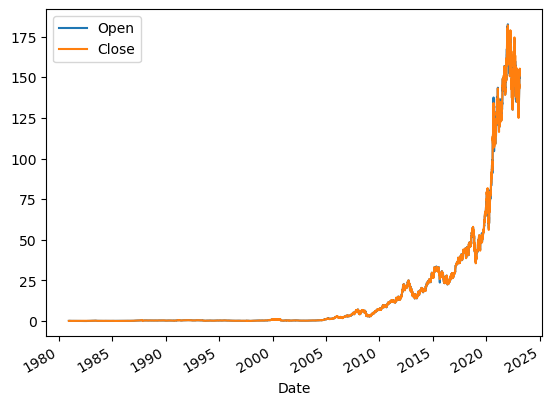

In [55]:
# Plot showing the opening and closing prices over the years
df[['Open','Close']].plot()
plt.show()

In [56]:
# SPlitting train and test
train_data  = df[7000:9300]
test_data =df[9300:]
training_data = train_data['Close'].values
test_data = test_data['Close'].values

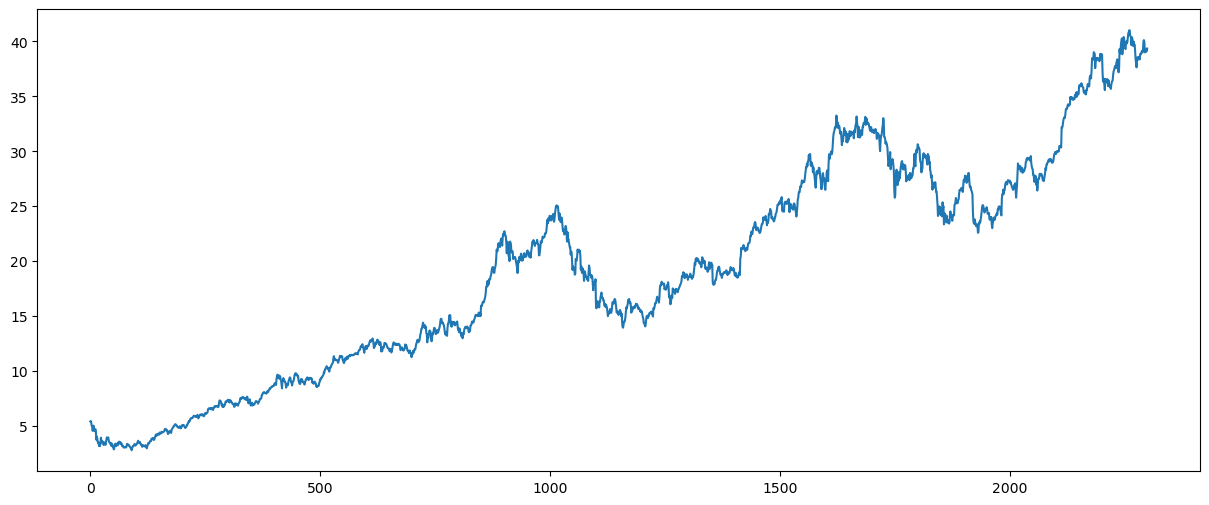

In [57]:
# Plotting train data
training_data1=pd.Series(training_data)
training_data1.plot(figsize=(15, 6))
plt.show()

In [58]:
df['First Order Difference'] = df['Close'] - df['Close'].shift(1)

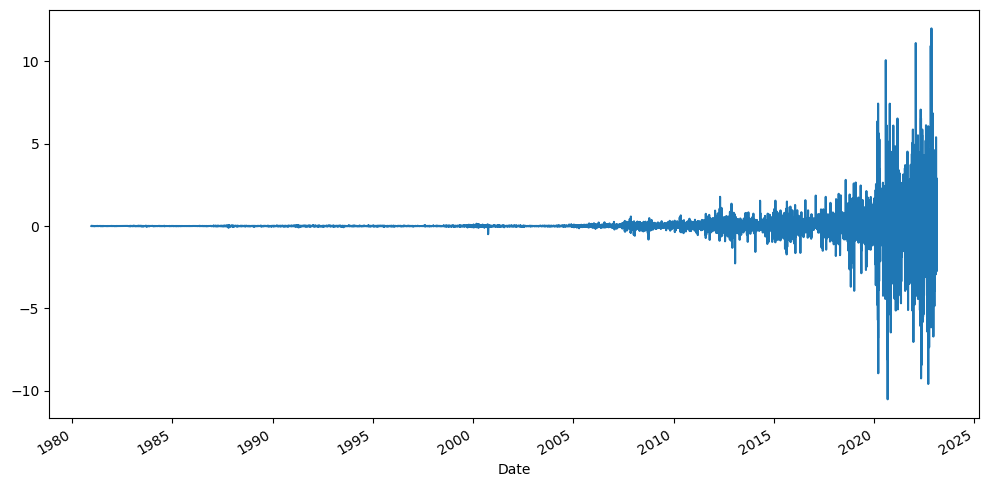

In [59]:
# Plot First Order Difference for the dataset
df['First Order Difference'].plot(figsize=(12, 6))
plt.show()

In [60]:
from statsmodels.tsa.stattools import adfuller
def adfuller_test(Close):
    result=adfuller(Close)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value))
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis (H0), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [61]:
adfuller_test(df['Close'])

ADF Test Statistic : 2.6534510355312495
p-value : 0.9990831392934654
#Lags Used : 39
Number of Observations Used : 10595
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [62]:

#ACF plotfor choosing "q"

from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

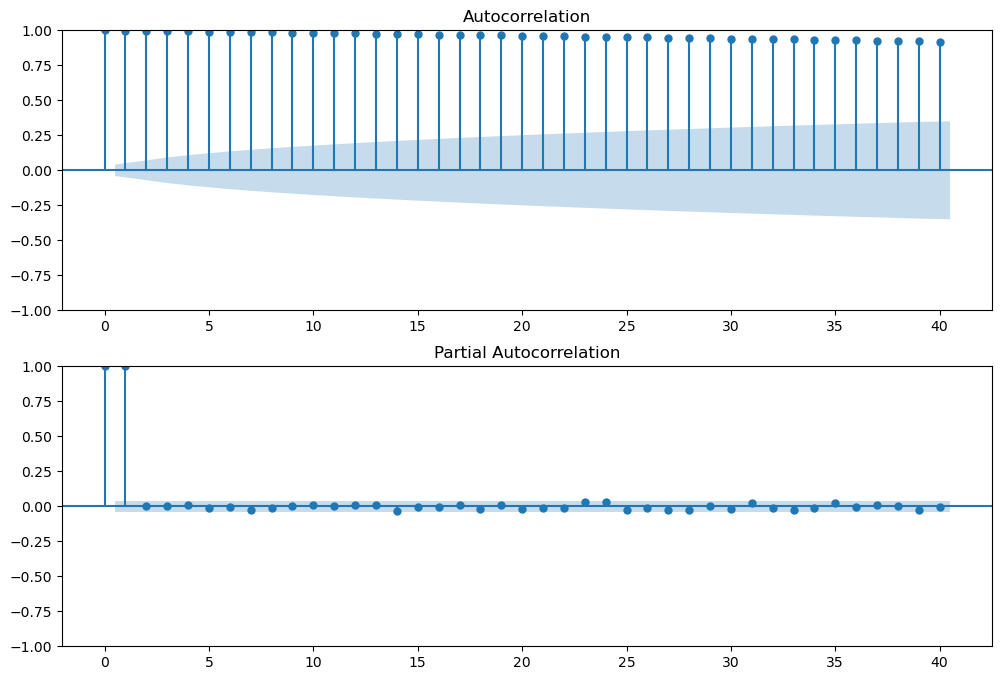

In [63]:
# ACF and PACF plots for training data
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(training_data1, lags=40, ax=ax1) # 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(training_data1, lags=40, ax=ax2)# , lags=40

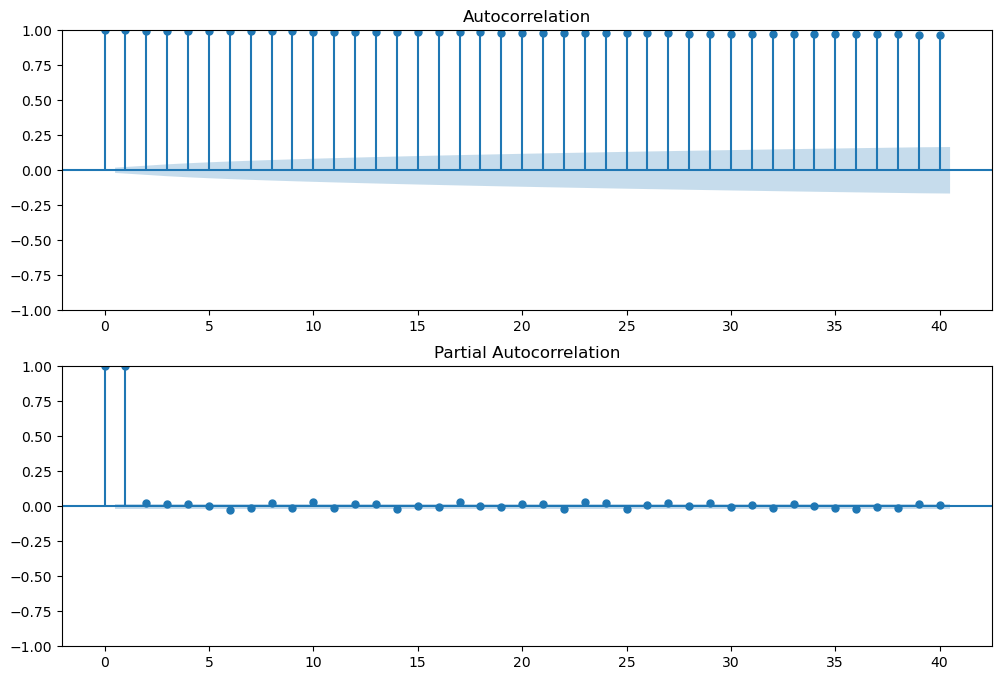

In [64]:
#Draw PACF Chart and Chose Hyperparameter p in AR Model
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df.Open, lags=40, ax=ax1) # 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df.Open, lags=40, ax=ax2)# , lags=40

In [65]:
# !pip install pmdarima

In [66]:
#selecting d parameter
from pmdarima.arima.utils import ndiffs
ndiffs(df.Close, test="adf")

1

In [67]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

# Convert index to datetime if it is not already in datetime format
if not isinstance(df.index, pd.DatetimeIndex):
    df.index = pd.to_datetime(df.index)

# Create a series from the Close column
series = training_data

# Fit an ARIMA model to the series
model = ARIMA(series, order=(2, 1, 1))


model_fit = model.fit()

# Print the model summary
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2300
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -647.246
Date:                Mon, 17 Apr 2023   AIC                           1302.491
Time:                        23:52:44   BIC                           1325.452
Sample:                             0   HQIC                          1310.863
                               - 2300                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3939      0.410      0.961      0.337      -0.409       1.197
ar.L2         -0.0364      0.017     -2.144      0.032      -0.070      -0.003
ma.L1         -0.3776      0.412     -0.917      0.3

In [68]:
# Use the model to forecast values for the test set
forecast = model_fit.forecast(steps=len(test_data))

In [69]:
test_data

array([ 40.76250076,  41.68000031,  42.25999832, ..., 153.1999969 ,
       155.3300018 , 153.7100067 ])

In [70]:
forecast

array([39.35971041, 39.35344612, 39.35071582, ..., 39.34955158,
       39.34955158, 39.34955158])

In [71]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test_data, forecast)
print("MAE:", mae)

MAE: 58.018205718622156


In [72]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test_data, forecast)
print('Test RMSE: %.3f' % error)

Test RMSE: 5530.252
